In [17]:
### Pfizer Vaccine Sentiment Analysis using Python

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# Download the 'punkt_tab' data package
nltk.download('punkt_tab')
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

In [7]:
# Load dataset (replace with actual dataset path)
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/twitter.csv")
data.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
# Checking for null values
data.isnull().sum()

# Drop rows with missing values
data = data.dropna()

# Data Cleaning
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = ' '.join(word for word in text.split() if not word.startswith('@'))  # Remove mentions
    text = ' '.join(word for word in text.split() if not word.startswith('http'))  # Remove links
    text = ' '.join(word for word in text.split() if word.isalpha())  # Remove special characters and numbers
    return text

data['Cleaned_Text'] = data['tweet'].apply(clean_text)
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_Text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you complain about cleaning up y...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats dwn bad for cuffin dat hoe in the
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt rt you ever fuck a bitch and she start to y...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true or...


In [9]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data['Sentiment'] = data['Cleaned_Text'].apply(get_sentiment)
data['Sentiment'].value_counts()

,count
Sentiment,
Neutral,11021
Positive,6997
Negative,6765


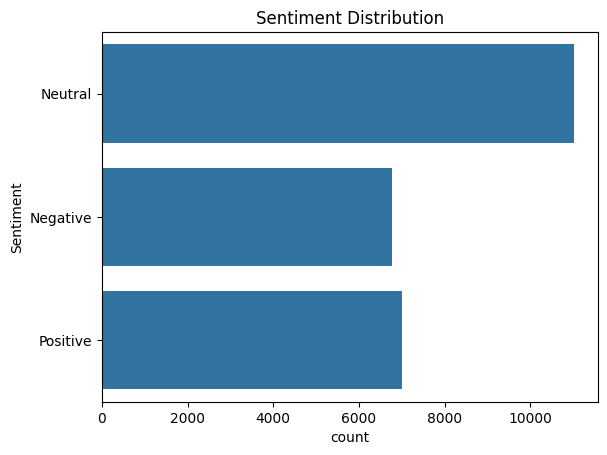

In [10]:
# Visualizing Sentiment Distribution
sns.countplot(data['Sentiment'])
plt.title("Sentiment Distribution")
plt.show()

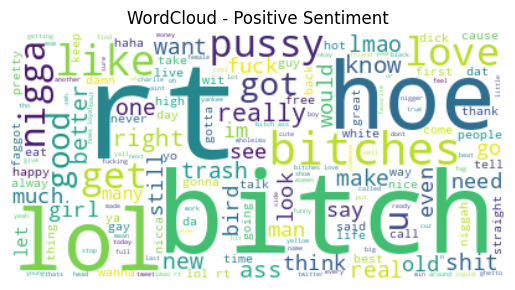

In [11]:
# WordCloud for Positive Sentiment
positive_text = " ".join(text for text in data[data['Sentiment'] == 'Positive']['Cleaned_Text'])
wordcloud_positive = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Sentiment")
plt.show()

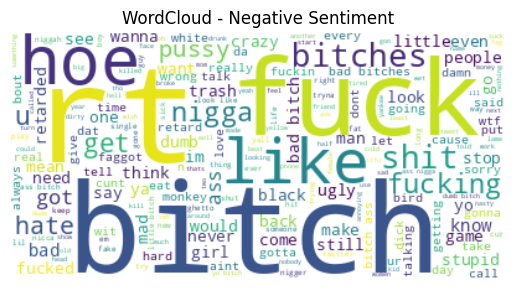

In [12]:

# WordCloud for Negative Sentiment
negative_text = " ".join(text for text in data[data['Sentiment'] == 'Negative']['Cleaned_Text'])
wordcloud_negative = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Sentiment")
plt.show()

In [13]:

# Tokenization
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Cleaned_Text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_Text,Sentiment,Tokens
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you complain about cleaning up y...,Neutral,"[rt, woman, complain, cleaning, man, always, t..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats dwn bad for cuffin dat hoe in the,Negative,"[rt, boy, dats, dwn, bad, cuffin, dat, hoe]"
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt rt you ever fuck a bitch and she start to y...,Negative,"[rt, rt, ever, fuck, bitch, start, confused, s..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny,Neutral,"[rt, look, like, tranny]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true or...,Positive,"[rt, shit, hear, might, true, might, faker, bi..."


In [14]:
# Most Common Words in Positive Sentiment
positive_words = " ".join(" ".join(tokens) for tokens in data[data['Sentiment'] == 'Positive']['Tokens'])
cv = CountVectorizer(max_features=10)
pos_words_count = cv.fit_transform([positive_words]).toarray()
print("Most Common Words in Positive Sentiment:", cv.get_feature_names_out())

Most Common Words in Positive Sentiment: ['bitch' 'bitches' 'good' 'got' 'hoes' 'like' 'lol' 'love' 'pussy' 'rt']


In [16]:
# Most Common Words in Negative Sentiment
negative_words = " ".join(" ".join(tokens) for tokens in data[data['Sentiment'] == 'Negative']['Tokens'])
neg_words_count = cv.fit_transform([negative_words]).toarray()
print("Most Common Words in Negative Sentiment:", cv.get_feature_names_out())

Most Common Words in Negative Sentiment: ['ass' 'bitch' 'bitches' 'fuck' 'fucking' 'get' 'hoes' 'like' 'rt' 'shit']


In [ ]:
# End!